In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
a = tf.constant(3.0)
b = tf.constant(4.0)

In [3]:
print(a)
print(b)

Tensor("Const:0", shape=(), dtype=float32)
Tensor("Const_1:0", shape=(), dtype=float32)


In [4]:
sess =  tf.InteractiveSession()
print(sess.run([a,b]))

[3.0, 4.0]


In [5]:
a = tf.constant(3.0)
b = tf.constant(4.0)
s = tf.multiply(a,b)
print(sess.run(s))

12.0


In [6]:
c = tf.constant(2.0)
d = tf.constant(3.0)
e = tf.constant(8.0)
f = tf.constant(6.0)
g = tf.constant(4.0)
res1 = tf.multiply(e,tf.add(c,d))
res2 = tf.multiply(f,tf.add(f,g))
res = tf.subtract(res1, res2)
print(sess.run(res))



-20.0


In [7]:
x = tf.placeholder(tf.float32)
func = 5*tf.log(x) + tf.exp(x)

input_list = list(np.arange(1,10))
output_list = [sess.run(func,feed_dict = {x:i}) for i in input_list]
print(output_list)

[2.7182817, 10.854792, 25.578598, 61.52962, 156.46036, 412.3876, 1106.3627, 2991.3552, 8114.0703]


Text(0, 0.5, 'Outputs')

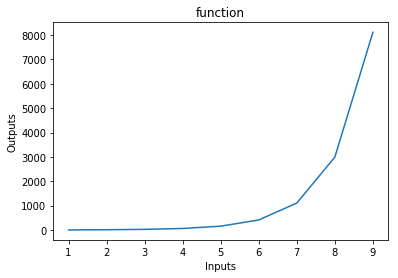

In [8]:
plt.plot(input_list, output_list)
plt.title('function')
plt.xlabel('Inputs')
plt.ylabel('Outputs')

In [9]:
W = tf.Variable(tf.constant(0.1,shape=[10,1]))
x = tf.placeholder(tf.float32, shape=[1,10])
mat_mul = tf.matmul(x,W)

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
data = np.arange(10).reshape((1,10))

init = tf.global_variables_initializer()
sess.run(init)
sess.run(mat_mul, feed_dict = {x:data})

array([[4.5]], dtype=float32)

In [0]:
from sklearn.datasets import load_boston
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

def get_data():
  data, targets = load_boston(True)
  data = normalize(data)
  targets = targets.reshape((targets.shape[0],1))
  X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size = 0.3, random_state = 42)
  return X_train, X_test, y_train, y_test

In [16]:
X_train, X_test, y_train, y_test = get_data()
print(",".join([str(t.shape) for t in (X_train, X_test, y_train, y_test)]))

(354, 13),(152, 13),(354, 1),(152, 1)


In [0]:
X = tf.placeholder(tf.float32,shape = [None,13])
y = tf.placeholder(tf.float32,shape = [None,1])

W = tf.Variable(tf.constant(0.1,shape = [13,1]))
b = tf.Variable(tf.constant(0.1))

In [0]:
y_pred = tf.matmul(X,W) + b 
loss = tf.reduce_mean(tf.square(y_pred - y))
opt = tf.train.GradientDescentOptimizer(learning_rate = 0.5).minimize(loss)

In [22]:
init = tf.global_variables_initializer()
sess = tf.InteractiveSession()
sess.run(init)
initial_loss = loss.eval(feed_dict = {X:X_train, y : y_train})
print("initial loss: {}".format(initial_loss))
for i in range(5000):
  sess.run(opt, feed_dict = {X: X_train, y:y_train})
  if i%100 == 0:
    print("current loss: {}".format(loss.eval(feed_dict = {X:X_train, y:y_train})))
    

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


initial loss: 605.650634765625
current loss: 536.6198120117188
current loss: 66.02775573730469
current loss: 64.59042358398438
current loss: 63.530433654785156
current loss: 62.687217712402344
current loss: 61.973018646240234
current loss: 61.33906555175781
current loss: 60.757774353027344
current loss: 60.21317672729492
current loss: 59.69572448730469
current loss: 59.199554443359375
current loss: 58.720848083496094
current loss: 58.257083892822266
current loss: 57.80647659301758
current loss: 57.36771011352539
current loss: 56.93983840942383
current loss: 56.52207946777344
current loss: 56.113826751708984
current loss: 55.714599609375
current loss: 55.323974609375
current loss: 54.941612243652344
current loss: 54.56718826293945
current loss: 54.200469970703125
current loss: 53.841190338134766
current loss: 53.48914337158203
current loss: 53.14414596557617
current loss: 52.80601119995117
current loss: 52.47457504272461
current loss: 52.149662017822266
current loss: 51.83114242553711
c

In [23]:
data, targets = X_test, y_test
predictions = sess.run(y_pred, feed_dict ={X:data})
predictions = predictions.flatten()
targets = targets.reshape((152))

for i in range(10):
  randint = np.random.randint(0,152)
  pred = predictions[randint]
  actual = targets[randint]
  print("prediction:{},actual:{}".format(pred,actual))
  

prediction:17.935466766357422,actual:15.7
prediction:6.05327033996582,actual:7.0
prediction:26.101322174072266,actual:25.0
prediction:20.2034969329834,actual:21.2
prediction:20.73275375366211,actual:20.0
prediction:20.087661743164062,actual:19.3
prediction:12.77627182006836,actual:15.6
prediction:35.85618209838867,actual:50.0
prediction:30.64351463317871,actual:32.4
prediction:29.037307739257812,actual:20.9
